In [35]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

Now we move on to analyse the blitz dataset for highly ranked players.

In [36]:
chessdata = pd.read_csv('blitzLowRatingData.csv')
chessdata['Opening_new'].describe()


count                24460
unique                  90
top       Sicilian Defense
freq                  2462
Name: Opening_new, dtype: object

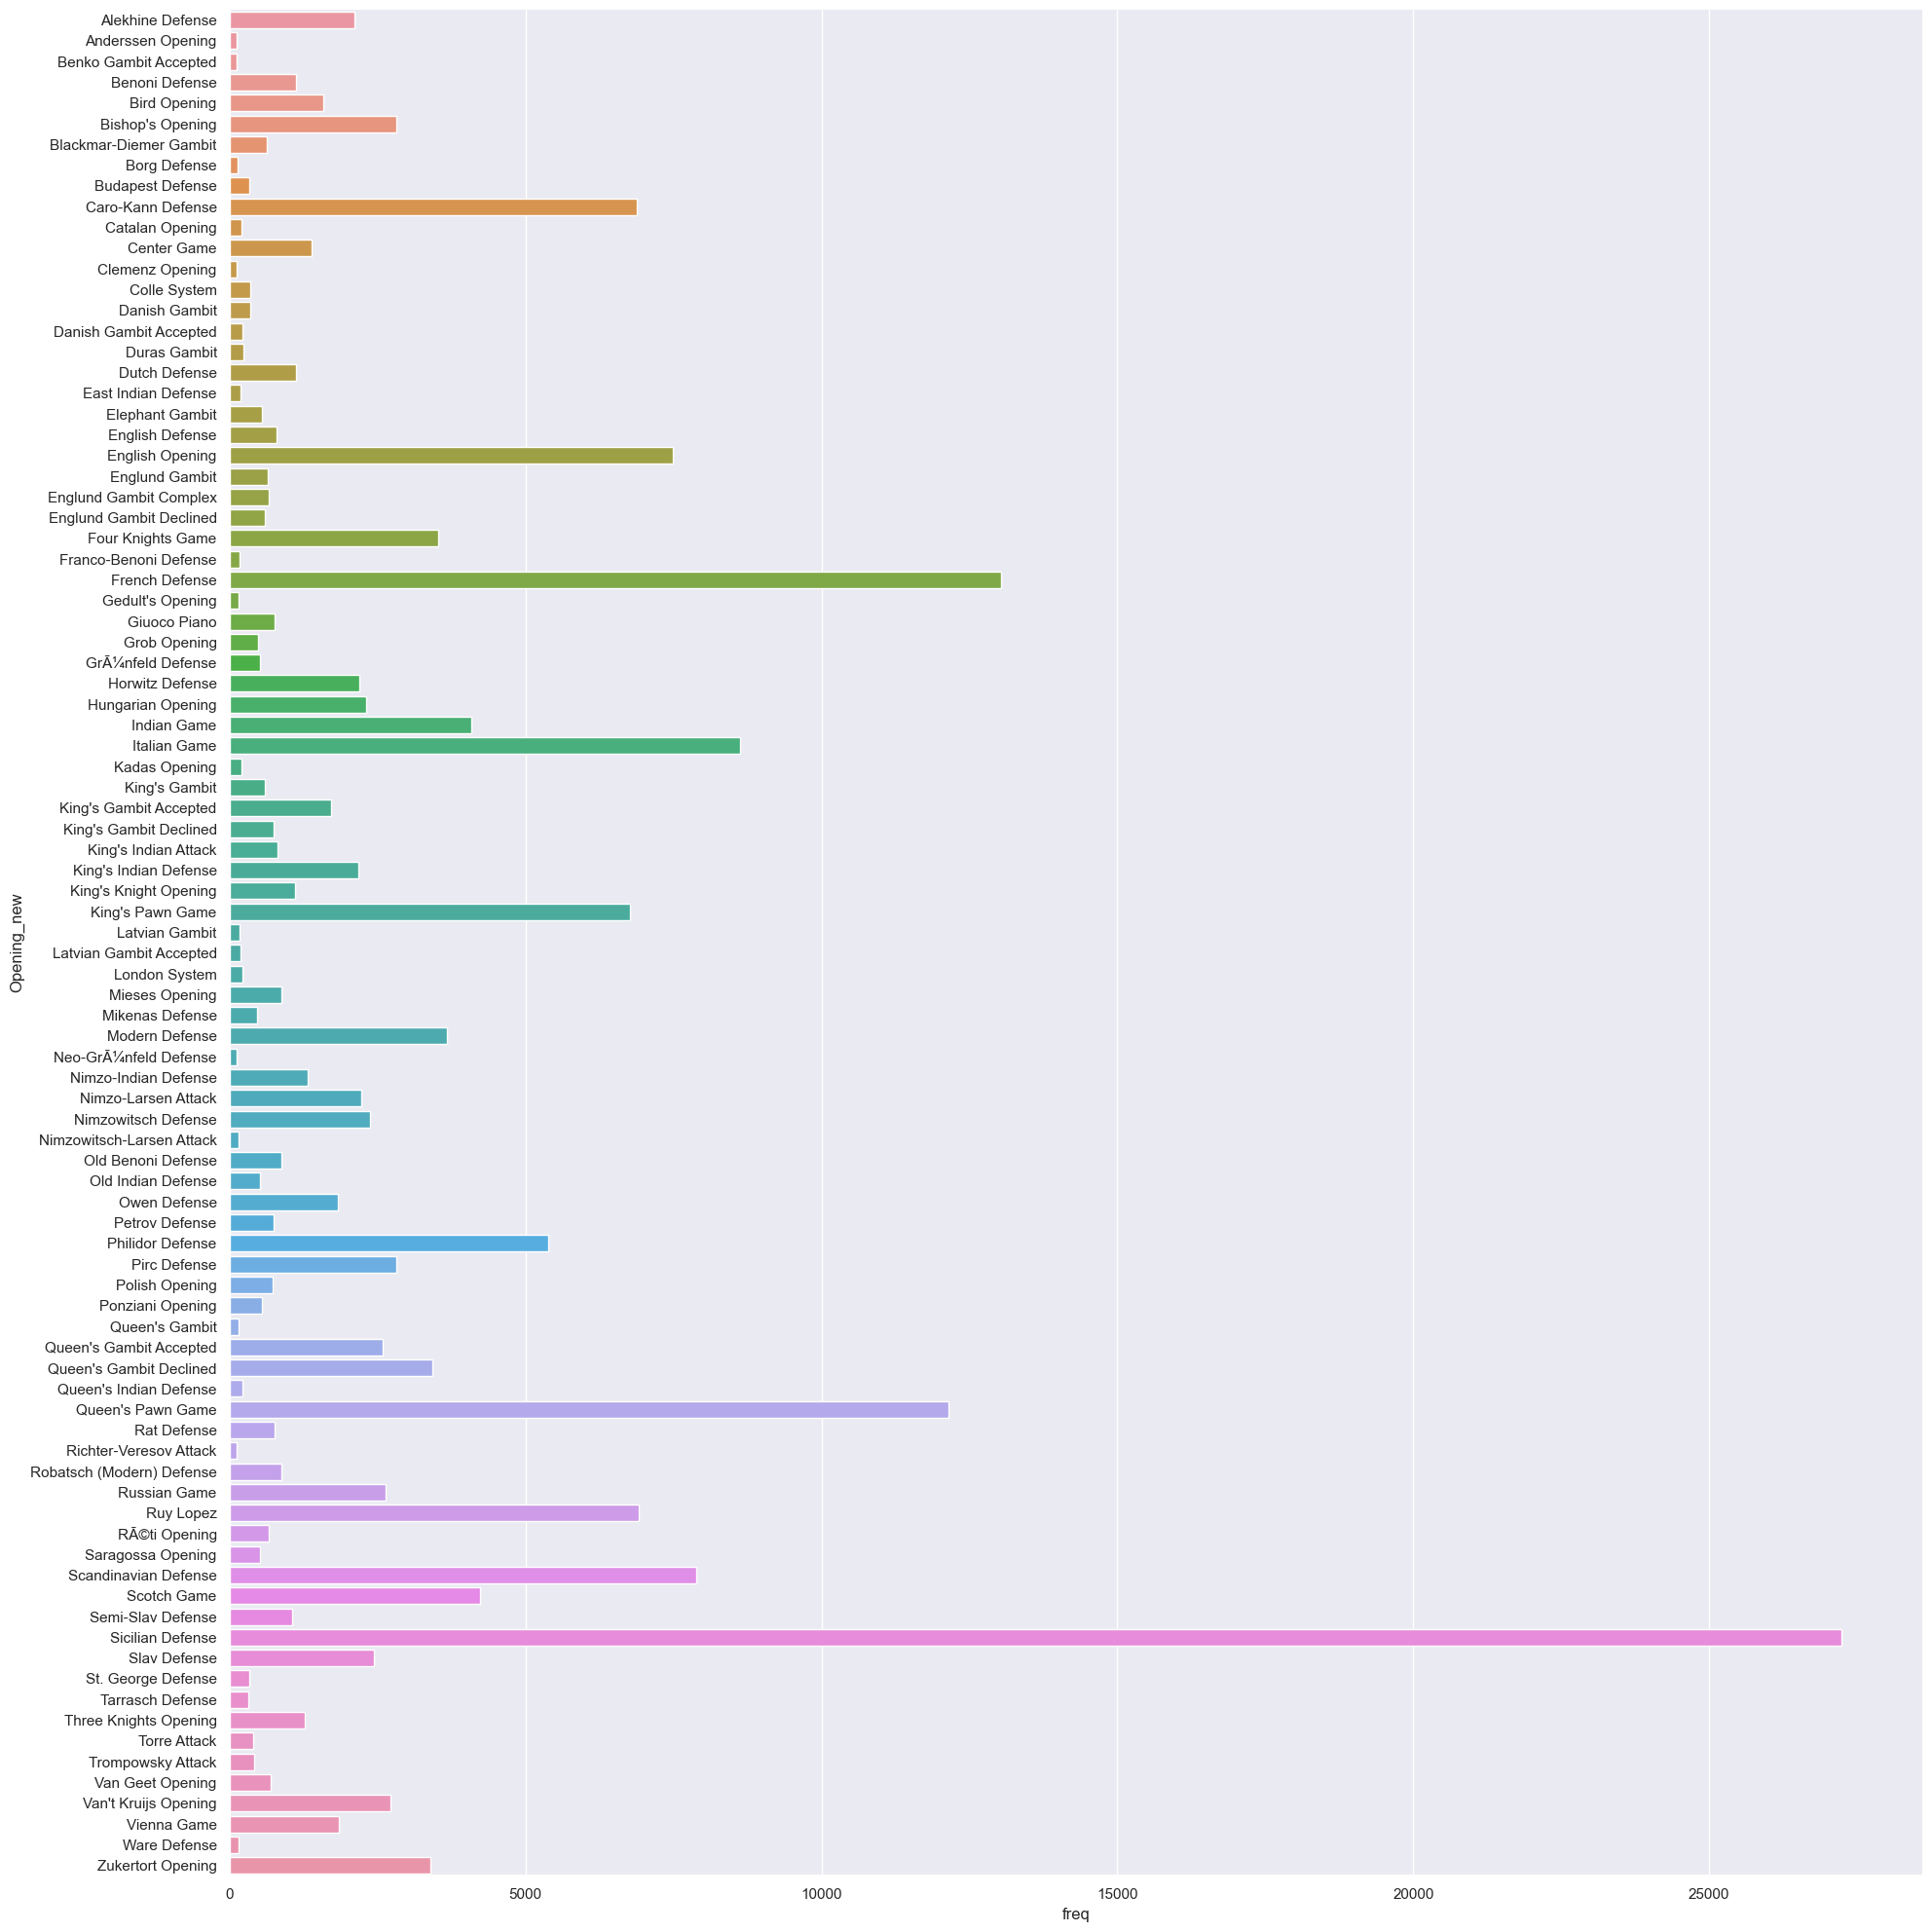

In [37]:
myorder=sorted(chessdata['Opening_new'].drop_duplicates())

sb.catplot(x= 'freq', y='Opening_new', data = chessdata, kind='bar',orient='h', height=20, aspect=1, order=myorder, errorbar=None)


In [38]:
freq_gen = chessdata
freq_gen['tot'] = freq_gen.groupby('Opening_new')['Opening_new'].transform('count')


# freq_gen['Opening_new'] = freq_gen['Opening_new'].drop_duplicates()
# freq_gen = freq_gen.dropna()
# frgeeq_n



In [39]:
temp = freq_gen[['Opening_new', 'Result', 'tot']]

#convert the fucking strings to integers
temp.loc[temp.Result == "0-1", 'Result'] = 0
temp.loc[temp.Result == "1-0", 'Result'] = 1
temp.loc[temp.Result == "1/2-1/2", 'Result'] = 0


temp['win'] = temp.groupby('Opening_new')['Result'].transform('sum')

temp['Opening_new'] = temp['Opening_new'].drop_duplicates()
temp = temp.dropna()

temp = temp.drop('Result', axis=1)
temp["win_rate"] = temp["win"].div(temp["tot"].values)

temp.sort_values(by=['win_rate'])


C:\Users\rinoa\AppData\Local\Temp\ipykernel_15240\2706443046.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['win'] = temp.groupby('Opening_new')['Result'].transform('sum')
C:\Users\rinoa\AppData\Local\Temp\ipykernel_15240\2706443046.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Opening_new'] = temp['Opening_new'].drop_duplicates()


,Opening_new,tot,win,win_rate
20685,Benko Gambit Accepted,1,0,0.0
5476,Budapest Defense,6,1,0.166667
320,Clemenz Opening,17,4,0.235294
319,Colle System,31,9,0.290323
9350,Catalan Opening,3,1,0.333333
...,...,...,...,...
150,Latvian Gambit,23,15,0.652174
276,Queen's Gambit,18,12,0.666667
199,GrÃ¼nfeld Defense,16,11,0.6875
305,Englund Gambit,89,62,0.696629


Win rate for white

In [40]:
temp = temp[temp['tot'] >100]
temp.sort_values(by=['win_rate'])

,Opening_new,tot,win,win_rate
41,Van't Kruijs Opening,415,150,0.361446
258,Mieses Opening,109,43,0.394495
140,Blackmar-Diemer Gambit,108,43,0.398148
68,Nimzo-Larsen Attack,212,89,0.419811
205,Ponziani Opening,104,44,0.423077
6,Indian Game,350,149,0.425714
123,Alekhine Defense,218,98,0.449541
210,Petrov Defense,178,81,0.455056
44,King's Knight Opening,256,117,0.457031
0,Caro-Kann Defense,540,247,0.457407


Immediately we see, white performs very well in the Philidor Defense, Vienna Game, Zukertort Opening, Modern Defense and Semi-Slav Defense. The former, we mentioned in the BlitzMid dataset. We will take a closer look at these in the classification tree.

In [ ]:
temp1 = freq_gen[['Opening_new', 'Result', 'tot']]

#convert the fucking strings to integers
temp1.loc[temp1.Result == "0-1", 'Result'] = 1
temp1.loc[temp1.Result == "1-0", 'Result'] = 0
temp1.loc[temp1.Result == "1/2-1/2", 'Result'] = 0


temp1['win'] = temp1.groupby('Opening_new')['Result'].transform('sum')

temp1['Opening_new'] = temp1['Opening_new'].drop_duplicates()
temp1 = temp1.dropna()

temp1 = temp1.drop('Result', axis=1)
temp1["win_rate"] = temp1["win"].div(temp1["tot"].values)


temp1 = temp1[temp1['tot'] >100]
temp1.sort_values(by=['win_rate'])

C:\Users\rinoa\AppData\Local\Temp\ipykernel_15240\3596201361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['win'] = temp1.groupby('Opening_new')['Result'].transform('sum')
C:\Users\rinoa\AppData\Local\Temp\ipykernel_15240\3596201361.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['Opening_new'] = temp1['Opening_new'].drop_duplicates()


,Opening_new,tot,win,win_rate
199,GrÃ¼nfeld Defense,16,4,0.25
107,Trompowsky Attack,14,4,0.285714
305,Englund Gambit,89,27,0.303371
289,English Defense,77,24,0.311688
276,Queen's Gambit,18,6,0.333333
...,...,...,...,...
914,Kadas Opening,36,24,0.666667
319,Colle System,31,21,0.677419
320,Clemenz Opening,17,13,0.764706
5476,Budapest Defense,6,5,0.833333


Winrate for Black

,Opening_new,tot,win,win_rate
181,Queen's Gambit Accepted,428,146,0.341121
15,Philidor Defense,828,312,0.376812
32,Bird Opening,154,61,0.396104
29,Three Knights Opening,297,118,0.397306
121,Mikenas Defense,124,50,0.403226
5,Queen's Gambit Declined,673,278,0.413076
51,Russian Game,474,197,0.415612
17,Ruy Lopez,987,421,0.426545
189,Horwitz Defense,286,123,0.43007
172,Vienna Game,274,118,0.430657


Black does extremely well in the Van't Kruijs Opening, more than 5% points higher than the next best. We explained why in BlitzMid, and it is no suprise to see that a suboptimal first move suffers in the more competitive format.

In [43]:
# Import the encoder from sklearn
chessdata.loc[chessdata.Result == "0-1", 'Result'] = "-1" #black win
chessdata.loc[chessdata.Result == "1-0", 'Result'] = "1" #white win
chessdata.loc[chessdata.Result == "1/2-1/2", 'Result'] = "0" #draw
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cat_predictors = chessdata[["Opening_new"]]

In [44]:
ohe.fit(cat_predictors)
predictors_cat_ohe = pd.DataFrame(ohe.transform(cat_predictors).toarray(), 
                                  columns=ohe.get_feature_names_out(cat_predictors.columns))

In [45]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [46]:
chessdata.info()
chessData_num = chessdata[['ELO Diff']]
chessData_res = chessdata['Result']
chessData_ohe = pd.concat([chessData_num, predictors_cat_ohe, chessData_res], 
                           sort = False, axis = 1).reindex(index=chessData_num.index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24460 entries, 0 to 24459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    24460 non-null  int64  
 1   BlackElo      24460 non-null  int64  
 2   ECO           24460 non-null  object 
 3   Event         24460 non-null  object 
 4   Opening       24460 non-null  object 
 5   Result        24460 non-null  object 
 6   Termination   24460 non-null  object 
 7   TimeControl   24460 non-null  object 
 8   WhiteElo      24460 non-null  int64  
 9   BlackTitle    0 non-null      float64
 10  WhiteTitle    0 non-null      float64
 11  Move_ply_200  13 non-null     object 
 12  Category      24460 non-null  object 
 13  Opening_new   24460 non-null  object 
 14  freq          24460 non-null  int64  
 15  ELO Diff      24460 non-null  int64  
 16  Ave ELO       24460 non-null  float64
 17  tot           24460 non-null  int64  
dtypes: float64(3), int64(6), o

In [47]:


# Extract Response and Predictors
y = pd.DataFrame(chessData_ohe['Result'])
X = pd.DataFrame(chessData_ohe.drop('Result', axis = 1))


# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 6) 
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree


DecisionTreeClassifier(max_depth=6)

In [48]:
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

Train Data
Accuracy  :	 0.5487092629365729

Test Data
Accuracy  :	 0.5258926137912238



[Text(0.5426470588235294, 0.9285714285714286, 'ELO Diff <= 22.5\ngini = 0.519\nsamples = 17122\nvalue = [8162, 342, 8618]\nclass = White'),
 Text(0.29705882352941176, 0.7857142857142857, 'ELO Diff <= -88.5\ngini = 0.519\nsamples = 11557\nvalue = [5894, 240, 5423]\nclass = Black'),
 Text(0.1588235294117647, 0.6428571428571429, 'ELO Diff <= -215.5\ngini = 0.494\nsamples = 1877\nvalue = [1125, 33, 719]\nclass = Black'),
 Text(0.08823529411764706, 0.5, 'Opening_new_Scandinavian Defense <= 0.5\ngini = 0.421\nsamples = 299\nvalue = [213, 6, 80]\nclass = Black'),
 Text(0.047058823529411764, 0.35714285714285715, 'Opening_new_Scotch Game <= 0.5\ngini = 0.412\nsamples = 291\nvalue = [210, 6, 75]\nclass = Black'),
 Text(0.023529411764705882, 0.21428571428571427, 'ELO Diff <= -229.5\ngini = 0.406\nsamples = 287\nvalue = [209, 6, 72]\nclass = Black'),
 Text(0.011764705882352941, 0.07142857142857142, 'gini = 0.432\nsamples = 232\nvalue = [163, 6, 63]\nclass = Black'),
 Text(0.03529411764705882, 0.07

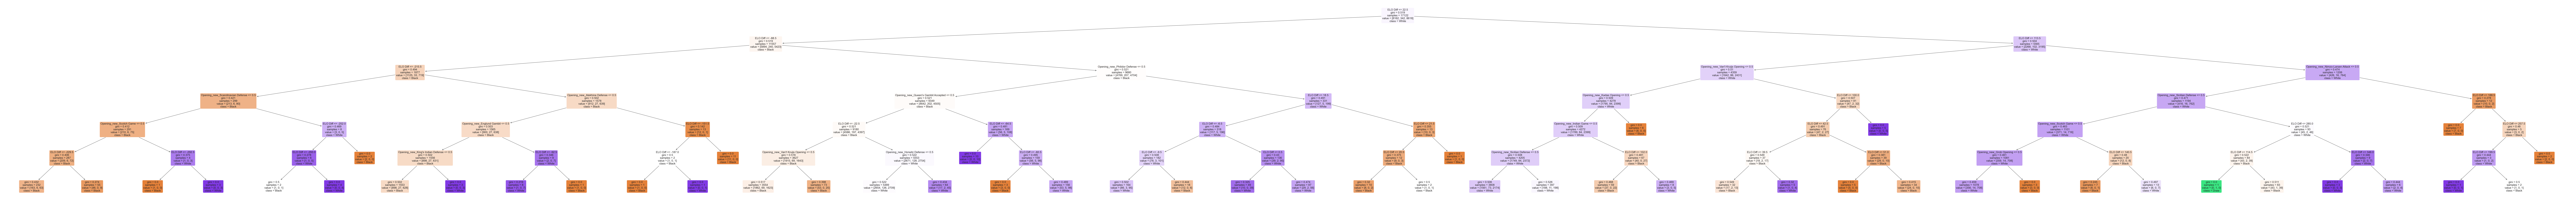

In [49]:
f = plt.figure(figsize=(256,20))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Black","Draw","White"])

![The Philidor Defence](lowphotos/left.png "Title")

![The Philidor Defence](lowphotos/mid.png "Title")

![The Philidor Defence](lowphotos/right.png "Title")

When Black is stronger than white:
Alekhine Defense strong for black
Scandanavian Def and Scotch game strong for white

Evenly matched:
Philidor Defense strong for white
QGA strong for white
Horwitz Def strong for white
Van't Kruijs strong for black

When White is stronger
Nimzo-Larsen strong for black
Sicilian equalises for black
Van't Kruijs strong for black

